In [36]:
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [37]:
import warnings
warnings.filterwarnings('ignore')

# one population
# population variance known

In [4]:
cwdata = np.array([80.57, 98.96, 85.28, 83.83, 69.94, 89.59, 91.09, 66.25, 91.21, 82.7 , 73.54, 81.99, 54.01, 
                 82.89, 75.88, 98.32, 107.2 , 85.53, 79.08, 84.3 , 89.32, 86.35, 78.98, 92.26, 87.01])

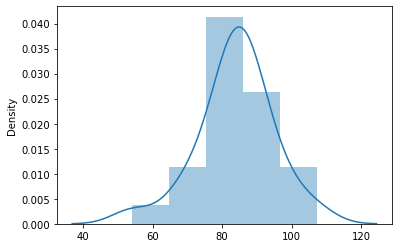

In [5]:
sns.distplot(cwdata,bins=5)
plt.show()

In [6]:
c=sm.stats.ztest(cwdata, value=80, alternative='larger')

In [7]:
type(c)

tuple

In [8]:
t=stats.t.cdf(cwdata, df=0.8)

In [9]:
# sns.distplot(t,bins=5)


# b. population variance unknown

You want to test an American citizen's claim that the average height of an AMerican is 175.3 cm. Measure the heights of ten American males  and use the T-test to determine if the American’s claim is true.

In [10]:
#1-sample t-test
one_sample_data=[177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]\

t_s, pv = stats.ttest_1samp(one_sample_data, 175.3)

In [11]:
print(pv)

0.04734137339747034


# 2. Difference in Population Means
Research Question

Considering adults in the NHANES data, do males have a significantly higher mean Body Mass Index than females?

Population: Adults in the NHANES data.

Parameter of Interest: 𝜇1−𝜇2, Body Mass Index.

Null Hypothesis: 𝜇1=𝜇2
Alternative Hypthosis: 𝜇1≠𝜇2
Data:

2976 Females; 𝜇1=29.94 ; 𝜎1=7.75
2759 Male Adults; 𝜇2=28.78; 𝜎2=6.25
𝜇1−𝜇2=1.16

In [12]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [13]:
bmi_data = pd.read_csv('D:\\Jupyter\\classroom\\bmi_data.csv')

In [14]:
bmi_data

,GENDER,BMI
0,1,27.8
1,1,30.8
2,1,28.8
3,2,42.4
4,2,20.3
...,...,...
5730,2,21.5
5731,1,33.8
5732,2,31.0
5733,1,26.0


In [16]:
female = bmi_data[bmi_data['GENDER'] == 2]
male = bmi_data[bmi_data['GENDER'] == 1]
male

,GENDER,BMI
0,1,27.8
1,1,30.8
2,1,28.8
6,1,28.0
8,1,26.2
...,...,...
5726,1,32.0
5728,1,32.9
5729,1,21.0
5731,1,33.8


In [19]:
n1 = len(female)
mu1 = female['BMI'].mean()
sd1 = female['BMI'].std()
(n1 ,mu1, sd1)

(2976, 29.939945652173996, 7.75331880954568)

In [21]:
n2 = len(male)
mu2 = male['BMI'].mean()
sd2 = male['BMI'].std()
(n1 ,mu2, sd2)


(2976, 28.778072111846985, 6.252567616801485)

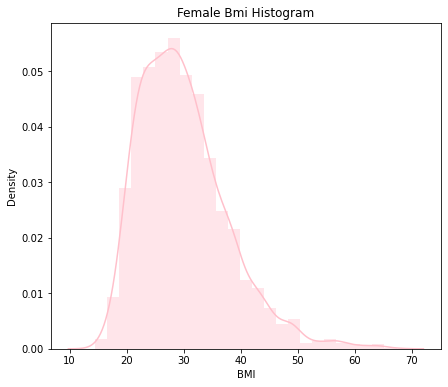

In [30]:
plt.figure(figsize=(7,6))
plt.title('Female Bmi Histogram')
sns.distplot(female['BMI'].dropna(), color='pink', bins=25)
plt.show()

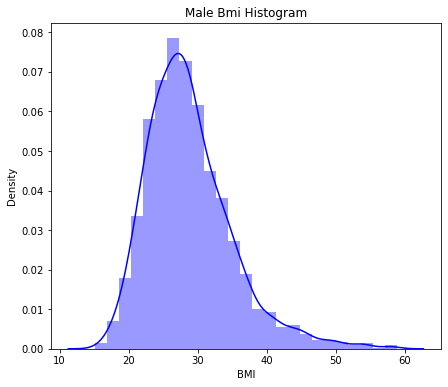

In [31]:
plt.figure(figsize=(7,6))
plt.title('Male Bmi Histogram')
sns.distplot(male['BMI'].dropna(), color='blue', bins=25)
plt.show()

In [34]:
# run the test
sm.stats.ztest(female['BMI'].dropna(), male['BMI'].dropna(), alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)


# One Population Proportion
Research Question

In previous years, 52% of parents believed that electronics and social media was the cause of their teenager’s lack of sleep. Do more parents today believe that their teenager’s lack of sleep is caused due to electronics and social media?

Population: Parents with a teenager (age 13-18)

Parameter of Interest: p

Null Hypothesis: p = 0.52

Alternative Hypthosis: p > 0.52 (note that this is a one-sided test)

Data: 1018 people were surveyed. 56% of those who were surveyed believe that their teenager’s lack of sleep is caused due to electronics and social media.
    

In [35]:
n = 1080
pnull = .52
phat = .56


In [38]:
sm.stats.proportions_ztest(phat*n, n, pnull, alternative='larger')

(2.648204488514251, 0.004046028066780298)

# ANOVA

In [39]:
df = pd.read_csv('D:\\Jupyter\\classroom\\diet.csv')
df

,Atkins,GM,South Beach
0,6,4,6
1,2,4,7
2,3,5,5
3,4,7,6
4,2,8,8
5,3,5,7
6,3,3,8
7,2,7,9
8,7,10,6
9,8,4,5


In [43]:
stats.f_oneway(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2])


F_onewayResult(statistic=3.5714285714285716, pvalue=0.039440588798258305)